In [41]:
import matplotlib.pyplot as plt
import cv2

In [42]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from keras_vggface.utils import preprocess_input
datagen = ImageDataGenerator(
    rescale=1/255, # масштабирование значений пикселей в диапазон от 0 до 1
    rotation_range=20, # угол поворота изображения
    width_shift_range=0.1, # смещение изображения по горизонтали
    height_shift_range=0.1, # смещение изображения по вертикали
    shear_range=0.2, # сдвиг изображения
    zoom_range=0.2, # масштабирование изображения
    # vertical_flip=True,
    horizontal_flip=True, # отражение изображения по горизонтали
    # brightness_range= (0.5,2.5),
    fill_mode='nearest', # заполнение пикселей после преобразований
    # preprocessing_function=preprocess_input # препроцессинг изображений для распознавания лиц

)

In [ ]:
# import os
# from keras.preprocessing import image
# import keras.utils as image


# original_dir = 'фото/cuted_test/'

# augmented_dir = 'фото/aug_cuted_test'

# if not os.path.exists(augmented_dir):
#     os.makedirs(augmented_dir)

# for root, dirs, files in os.walk(original_dir):
#     for filename in files:
#         img_path = os.path.join(root, filename)
#         img = image.load_img(img_path)
#         img = img.convert('RGB')
#         x = image.img_to_array(img)
#         x = preprocess_input(x)
#         x = x.reshape((1,) + x.shape)
#         i = 0
#         for batch in datagen.flow(x, batch_size=1,
#                                   save_to_dir=augmented_dir,
#                                   save_prefix=filename.split('.')[0],
#                                   save_format='jpg'):
#             i += 1
#             if i >= 5: # random 5 images
#                 break


In [43]:
datagen.flow_from_directory('../фото/tt/train/')

Found 684 images belonging to 15 classes.


In [44]:
datagen.flow_from_directory('../фото/tt/test/')

Found 75 images belonging to 15 classes.


In [45]:
# image_shape = (64,64,3)
# image_shape = (224,224,3)
image_shape = (150,150,3)

In [46]:
# from keras import Sequential
# from keras.layers import BatchNormalization
# from keras.regularizers import l2
# from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
# from keras.optimizers import Adam
# from tensorflow.keras.preprocessing import image



# import tensorflow as tf
# from tensorflow.keras import layers
# classifier = tf.keras.Sequential([
#     Conv2D(32, (3,3), activation='relu', padding='same', input_shape=image_shape),
#     BatchNormalization(),
#     Conv2D(32, (3,3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D(pool_size=(2,2)),
#     Dropout(0.5),
    
#     Conv2D(64, (4,4), activation='relu', padding='same'),
#     BatchNormalization(),
#     Conv2D(64, (4,4), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D(pool_size=(2,2)),
#     Dropout(0.5),
    
#     Conv2D(128, (4,4), activation='relu', padding='same'),
#     BatchNormalization(),
#     Conv2D(128, (4,4), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D(pool_size=(2,2)),
#     Dropout(0.5),
    
#     Flatten(),
#     Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
#     BatchNormalization(),
#     Dropout(0.5),
#     Dense(15, activation='softmax')
# ])

# classifier.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])




In [64]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

classifier= Sequential()


classifier.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(150,150,3), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Flatten())

classifier.add(Dense(64, activation='relu'))

classifier.add(Dense(15, activation='softmax'))

#classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])



In [65]:
classifier.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 146, 146, 32)      2432      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 69, 69, 64)        51264     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 34, 34, 64)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 73984)             0         
                                                                 
 dense_13 (Dense)            (None, 64)               

In [66]:
batch_size = 32

train_image_gen = datagen.flow_from_directory('../фото/tt/train/',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical') 
                                               # shuffle = True) #binary, sparse, categorical

Found 684 images belonging to 15 classes.


In [67]:
test_image_gen = datagen.flow_from_directory('../фото/tt/test/',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')
                                               # shuffle=True)

Found 75 images belonging to 15 classes.


In [68]:
train_image_gen.class_indices

{'Akhmedov Sanzhar': 0,
 'Alikhan Zhamankhan': 1,
 'Baibatchayeva Anar': 2,
 'Dalabay Abylay': 3,
 'Daniyar Raiymbekov': 4,
 'Duisenov Alikhan': 5,
 'Ernar': 6,
 'Kenzhebay Askar': 7,
 'Kyran Yerkin': 8,
 'Maxat Ualikhan': 9,
 'Rysmambetov Nurtugan': 10,
 'Sagynbek Nurbolat': 11,
 'Yerkin Yernar': 12,
 'Zhetessov Nur': 13,
 'Zhumabekov Magjan': 14}

In [69]:
import warnings
warnings.filterwarnings('ignore')

In [70]:
print(train_image_gen.n)
print(train_image_gen.batch_size)

684
32


In [77]:
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor='val_loss', patience=5)

from keras.callbacks import EarlyStopping, ModelCheckpoint

earlystop = EarlyStopping(monitor='val_loss', patience=5)

checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)




In [89]:
history = classifier.fit(train_image_gen,
                         steps_per_epoch=train_image_gen.n // train_image_gen.batch_size,
                         epochs=50,
                         validation_data=test_image_gen,
                         validation_steps=test_image_gen.n // test_image_gen.batch_size,
                         callbacks=[earlystop, checkpoint])

Epoch 1/50
21/21 [==============================] - 58s 3s/step - loss: 0.1356 - accuracy: 0.9509 - val_loss: 0.2694 - val_accuracy: 0.9531
Epoch 2/50
21/21 [==============================] - 58s 3s/step - loss: 0.1049 - accuracy: 0.9693 - val_loss: 0.4935 - val_accuracy: 0.8906
Epoch 3/50
21/21 [==============================] - 58s 3s/step - loss: 0.0897 - accuracy: 0.9617 - val_loss: 0.3324 - val_accuracy: 0.9219
Epoch 4/50
21/21 [==============================] - 59s 3s/step - loss: 0.0916 - accuracy: 0.9601 - val_loss: 0.2331 - val_accuracy: 0.9375
Epoch 5/50
21/21 [==============================] - 59s 3s/step - loss: 0.1305 - accuracy: 0.9555 - val_loss: 0.5057 - val_accuracy: 0.8750
Epoch 6/50
21/21 [==============================] - 59s 3s/step - loss: 0.1064 - accuracy: 0.9632 - val_loss: 0.2452 - val_accuracy: 0.9219
Epoch 7/50
21/21 [==============================] - 59s 3s/step - loss: 0.0907 - accuracy: 0.9709 - val_loss: 0.4076 - val_accuracy: 0.9062
Epoch 8/50
21/21 [==

In [90]:
history.history['accuracy']

[0.9509202241897583,
 0.9693251252174377,
 0.9616564512252808,
 0.9601227045059204,
 0.9555214643478394,
 0.9631901979446411,
 0.9708588719367981,
 0.9739263653755188,
 0.9647239446640015]

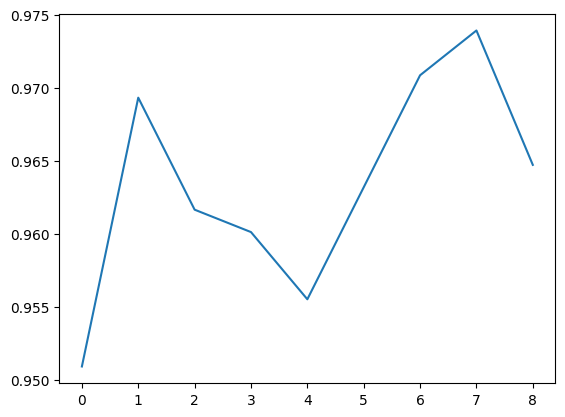

In [91]:
plt.plot(history.history['accuracy']) 

In [92]:
classifier.save('best_model123.h5')

In [94]:
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

model = load_model('best_model.h5')

class_dict = {
    0: 'Akhmedov Sanzhar',
    1: 'Alikhan Zhamankhan',
    2: 'Baibatchayeva Anar',
    3: 'Ernar',
    4: 'Daniyar Raiymbekov',
    5: 'Duisenov Alikhan',
    6: 'Dalabay Abylay',
    7: 'Kenzhebay Askar',
    8: 'Kyran Yerkin',
    9: 'Maxat Ualikhan',
    10: 'Rysmambetov Nurtugan',
    11: 'Sagynbek Nurbolat',
    12: 'Yerkin Yernar',
    13: 'Zhetessov Nur',
    14: 'Zhumabekov Magjan'
}

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    # print(ret, frame)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    face_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]
        face = cv2.resize(face, (150, 150))
        face = np.expand_dims(face, axis=0)
        face = np.expand_dims(face, axis=-1)
        face = face / 255.0

        # prediction = model.predict(face)
        # prediction_class = np.argmax(prediction)
        # print(prediction_class)
        # prediction_value = prediction[prediction_class] * 100
        # name = class_dict[prediction_class]
        
        
        prediction = model.predict(face)
        prediction_class = np.argmax(prediction, axis=-1)
        prediction_value = prediction[0][prediction_class[0]] * 100
        name = class_dict[prediction_class[0]]

        
        
        

        label = f"{prediction_value:.2f}% match, {name}"
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 255, 0), 2)

        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    cv2.imshow('frame', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 54ms/step


TypeError: 'History' object is not subscriptable